In [2]:
import pandas as pd

In [3]:
ramen_data = pd.read_csv('ramen-ratings.csv')

Text(0.5, 1.0, 'Country Vs No. of reviews')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


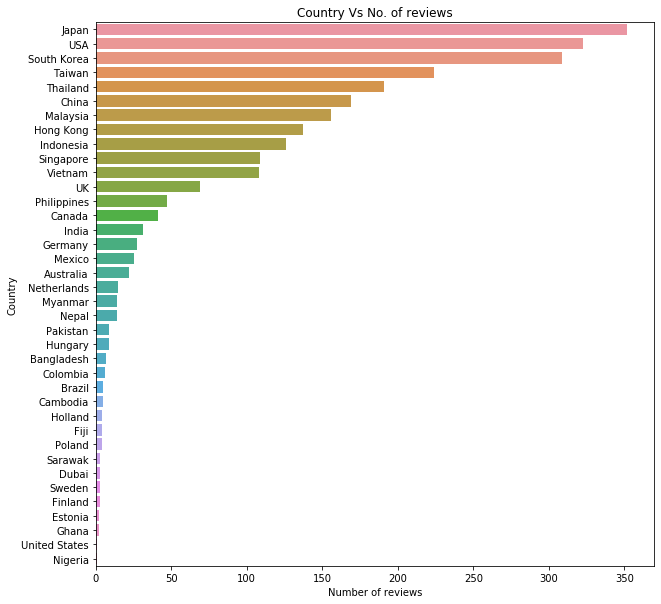

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt 
review_data = ramen_data.groupby(by = 'Country').count().sort_values(by = 'Stars',ascending =False)
plt.figure(figsize = (10,10))
sns.barplot(data = review_data,y=review_data.index ,x= 'Stars',orient='h' )
plt.xlabel('Number of reviews')
plt.title('Country Vs Number of reviews')

Text(0.5, 1.0, 'Top 5 Flavours')

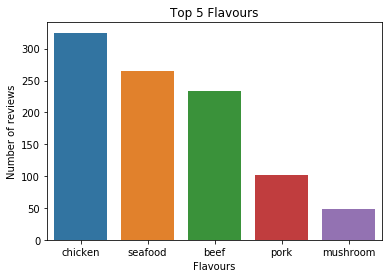

In [59]:
## top 5 Flavours 
topFlavours = {
    'chicken': 325,
    'seafood': 265,
    'beef': 233,
    'pork': 101,
    'mushroom': 48,
    
}
flavours = []
nums = []
for key, val in topFlavours.items():
    flavours.append(key)
    nums.append(val)
topFlavours = pd.DataFrame({'flavour':flavours, 'Number':nums})

sns.barplot(data = topFlavours,y='Number' ,x= 'flavour')
plt.ylabel('Number of reviews')
plt.xlabel('Flavours')
plt.title('Top 5 Flavours')



Text(0.5, 1.0, 'Top 5 Seasonings')

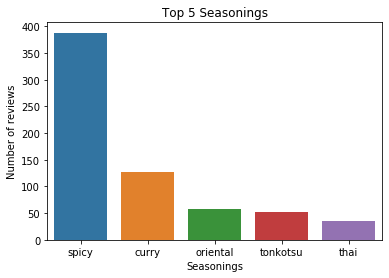

In [60]:
## top 5 Seasonings
topSeasonings = {
    'spicy': 388,
    'curry': 127,
    'oriental': 57,
    'tonkotsu': 53,
    'thai': 35
}

Seasonings = []
num = []
for key, val in topSeasonings.items():
    Seasonings.append(key)
    num.append(val)
topSeasonings = pd.DataFrame({'Seasonings':Seasonings, 'Number':num})
sns.barplot(data = topSeasonings,y='Number' ,x= 'Seasonings')
plt.ylabel('Number of reviews')
plt.xlabel('Seasonings')
plt.title('Top 5 Seasonings')

In [61]:
import pandasql as pdsql #To run SQL quries on pandas DataFrame
#Lets check top 10 brand which has most number variety in ramen
vairety_data = pdsql.sqldf("SELECT Brand,count(Variety) as Number_Of_Variety FROM ramen_data GROUP BY Brand")
vairety_data.sort_values(by = 'Number_Of_Variety',ascending =False,inplace =True)

In [7]:
top_ten = vairety_data[0:10]['Brand']

In [62]:
star_mean = pdsql.sqldf("SELECT Brand, sum(Stars)/count(Stars) as mean_star FROM ramen_data GROUP BY Brand")
star_mean.sort_values(by = 'mean_star',ascending =False,inplace =True)

In [11]:
star = []
for val in top_ten:
    star.append(list(star_mean[star_mean['Brand'] == val]['mean_star'])[0])

<BarContainer object of 10 artists>

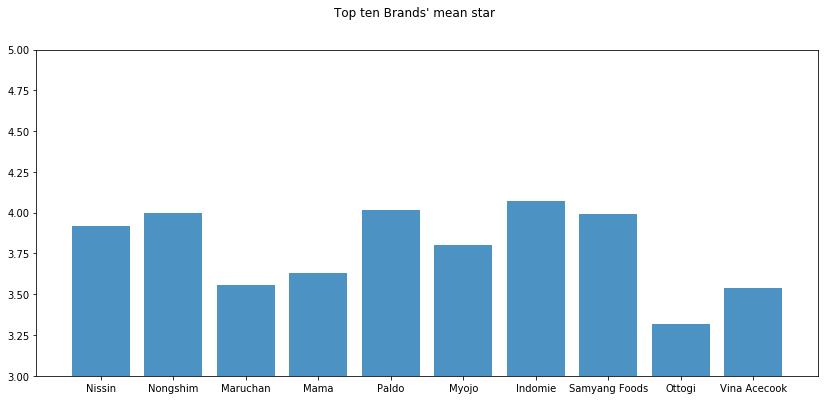

In [69]:
fig = plt.figure(figsize = (14,6))
plt.ylim(3, 5)
fig.suptitle("Top ten Brands' mean star")
plt.bar(x=top_ten, height=star, label='Mean Satr of Top Ten Brand', alpha=0.8)

In [64]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


([<matplotlib.patches.Wedge at 0x7fd22e7f0eb8>,
 [Text(0.35169821898912457, 1.1473048255628833, 'Nissin'),
  Text(-1.060916101822566, 0.29061490824390135, 'Nongshim'),
  Text(-1.046162158377023, -0.33991872319707317, 'Maruchan'),
  Text(-0.7620647497678156, -0.793257409143663, 'Mama'),
  Text(-0.3329183249928178, -1.0484108874310571, 'Paldo'),
  Text(0.13567789516583303, -1.0916004345745605, 'Myojo'),
  Text(0.53828508528374, -0.9592961831265029, 'Indomie'),
  Text(0.8352516134569611, -0.7157895935381734, 'Samyang Foods'),
  Text(1.0211219021364348, -0.40903552532423093, 'Ottogi'),
  Text(1.0929059039799023, -0.12472644084504683, 'Vina Acecook')],
 [Text(0.20515729441032263, 0.6692611482450153, '40.5%'),
  Text(-0.5786815100850359, 0.1585172226784916, '10.4%'),
  Text(-0.5706339045692853, -0.18541021265294896, '8.1%'),
  Text(-0.41567168169153573, -0.43268585953290706, '7.6%'),
  Text(-0.18159181363244606, -0.5718604840533038, '7.0%'),
  Text(0.07400612463590892, -0.5954184188588512, '

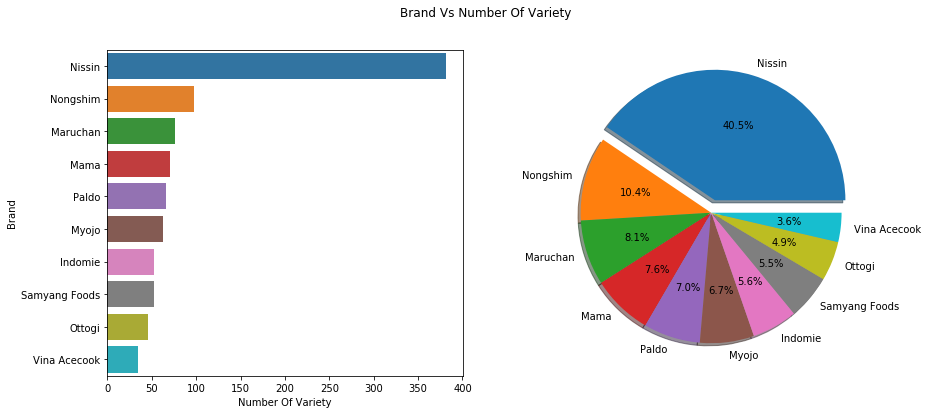

In [65]:
#Using bar plot and pie chart
fig = plt.figure(figsize = (14,6))
fig.suptitle('Brand Vs Number Of Variety')

#Using barplot from seaborn
ax1 = fig.add_subplot(121)
sns.barplot(data = vairety_data.head(10),y='Brand' ,x= 'Number_Of_Variety',orient='h',ax =ax1)
plt.xlabel('Number Of Variety')

#Using pie chart from matplotlib
ax2 = fig.add_subplot(122)
plt.pie(vairety_data.head(10)['Number_Of_Variety'],
        explode = (0.1,0,0,0,0,0,0,0,0,0),labels =vairety_data.head(10)['Brand'],
        autopct='%1.1f%%',
        shadow =True)
# Nissin has the most number of variety around 400

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


ramen = pd.read_csv("ramen-ratings.csv")
ramen.drop(ramen.loc[ramen['Stars']=='Unrated'].index, inplace=True)
#ramen['Stars'] = ramen['Stars'].astype(float)
table = ramen.pivot_table(columns = 'Style', index = "Country",values = "Review #", aggfunc=len, margins=True, 
                       dropna=True, fill_value=0)
table2 = table.div(2576, axis=0).astype('float')

#转换成百分比显示
#for x in table2.columns:
#    table2[x] = pd.Series(["{0:.2f}%".format(val * 100) 
#                             for val in table2[x]], index = table2.index)

#做heat map（用float）
# fig, ax = plt.subplots(figsize=(11, 9))
# sb.heatmap(table2, annot = True)
# plt.show()


In [118]:
f = lambda x: '%.2f' % x

In [119]:
table2 = table2.applymap(f)

In [120]:
table2 = table2.astype('float64')

In [122]:
table2 = table2.loc[table2['All']>0.00]

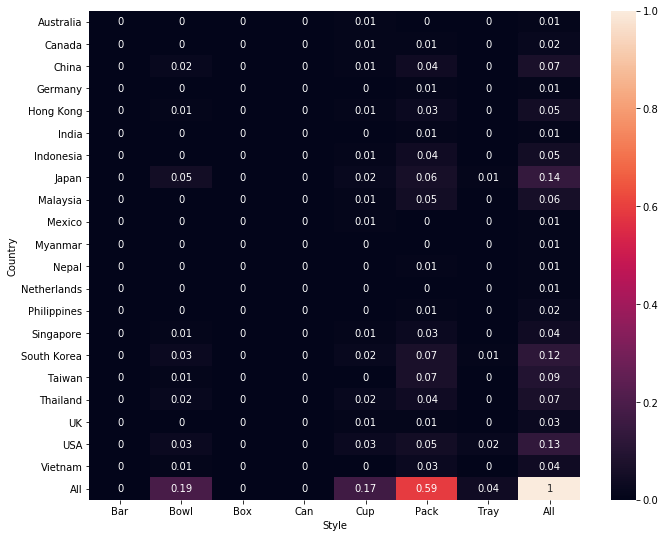

In [123]:
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(table2, annot = True)
plt.show()

In [1]:
pip install worldcloud

  ERROR: Could not find a version that satisfies the requirement worldcloud (from versions: none)
ERROR: No matching distribution found for worldcloud
Note: you may need to restart the kernel to use updated packages.
